<div class="card text-center" style = "text-align : center ; background-color : #FAF0E6; color : black; border : 5px solid #E5E5CB; border-radius : 20px; font-family : Rockwell Condensed  ">
  <div class="card-header">
    Python Project
  </div>
  <div class="card-body">
    <h5 class="card-title">Sharif University Of Technology</h5>
    <img src = "logo.png">
    <p class="card-text">Instructor :  Dr.Rezapour</p>
    <h5>Spring 2024</h5>
    <!-- <a href="#" class="btn btn-primary">Go somewhere</a> -->
  </div>
  <div class="card-footer text-muted">
    created by Leili Motahari(99171214)
  </div>
</div>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import tabulate
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from functions import futureValue , PresentValue

<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D" >1) Cleaning Data</h1>

<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px" >In this section, we want to replace a null data with an appropriate value. In this section, the alternative method is to use the average of the available data.
In this section, we want to replace a null data with an appropriate value. In this section, the alternative method is to use the average of the available data
First, read the file and then use the apply method to fill the Nan values ​​with the average value on the first column. The method used will not consider Nan values ​​in the average calculation, and as a result, we do not have an error in this section.
</div>


In [3]:
file_path = 'data.xlsx'
df = pd.read_excel(file_path)
df = df.apply(lambda x: x.fillna(x.mean()), axis=0)
output_file_path = 'new_data.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Now we have a new file with no null data named as {output_file_path}")


Now we have a new file with no null data named as new_data.xlsx


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">2) Staff Salaries </h1>

<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px" >
In this section, we plan to predict employee salaries until 2050 by implementing a linear regression. For this, we open the new file and read its data.
</div>

In [4]:
file_path = 'new_data.xlsx'
df = pd.read_excel(file_path)
X , y  = df['Years'].values.reshape(-1, 1) , df['Salary'].values
model = LinearRegression()
model.fit(X, y)
future_year = np.array([[df['Years'].max() + 28]])
predicted_salary = model.predict(future_year)
output_df = pd.DataFrame({
    'Year': df['Years'].tolist() + [future_year[0][0]],
    'Salary': df['Salary'].tolist() + [predicted_salary[0]]
})
print(tabulate.tabulate(output_df, headers='keys', tablefmt="fancy_grid"))
output_file_path = 'salary_predictions.xlsx'
output_df.to_excel(output_file_path, index=False)
print(f"Predictions of salaries are saved in {output_file_path}")


╒════╤════════╤══════════╕
│    │   Year │   Salary │
╞════╪════════╪══════════╡
│  0 │   1990 │    39343 │
├────┼────────┼──────────┤
│  1 │   1991 │    46205 │
├────┼────────┼──────────┤
│  2 │   1992 │    37731 │
├────┼────────┼──────────┤
│  3 │   1993 │    43525 │
├────┼────────┼──────────┤
│  4 │   1994 │    39891 │
├────┼────────┼──────────┤
│  5 │   1995 │    56642 │
├────┼────────┼──────────┤
│  6 │   1996 │    60150 │
├────┼────────┼──────────┤
│  7 │   1997 │    54445 │
├────┼────────┼──────────┤
│  8 │   1998 │    64445 │
├────┼────────┼──────────┤
│  9 │   1999 │    57189 │
├────┼────────┼──────────┤
│ 10 │   2000 │    63218 │
├────┼────────┼──────────┤
│ 11 │   2001 │    55794 │
├────┼────────┼──────────┤
│ 12 │   2002 │    56957 │
├────┼────────┼──────────┤
│ 13 │   2003 │    76003 │
├────┼────────┼──────────┤
│ 14 │   2004 │    57081 │
├────┼────────┼──────────┤
│ 15 │   2005 │    61111 │
├────┼────────┼──────────┤
│ 16 │   2006 │    67938 │
├────┼────────┼──────────┤
│

<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">3) Regression Plot on Salary </h1>

<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px">In this section, we intend to draw a plot of the applied regression and the salary data given in the initial file and measure the accuracy of the model.
Three criteria are used to measure the accuracy of the model and the result is written based on the first criterion</div>

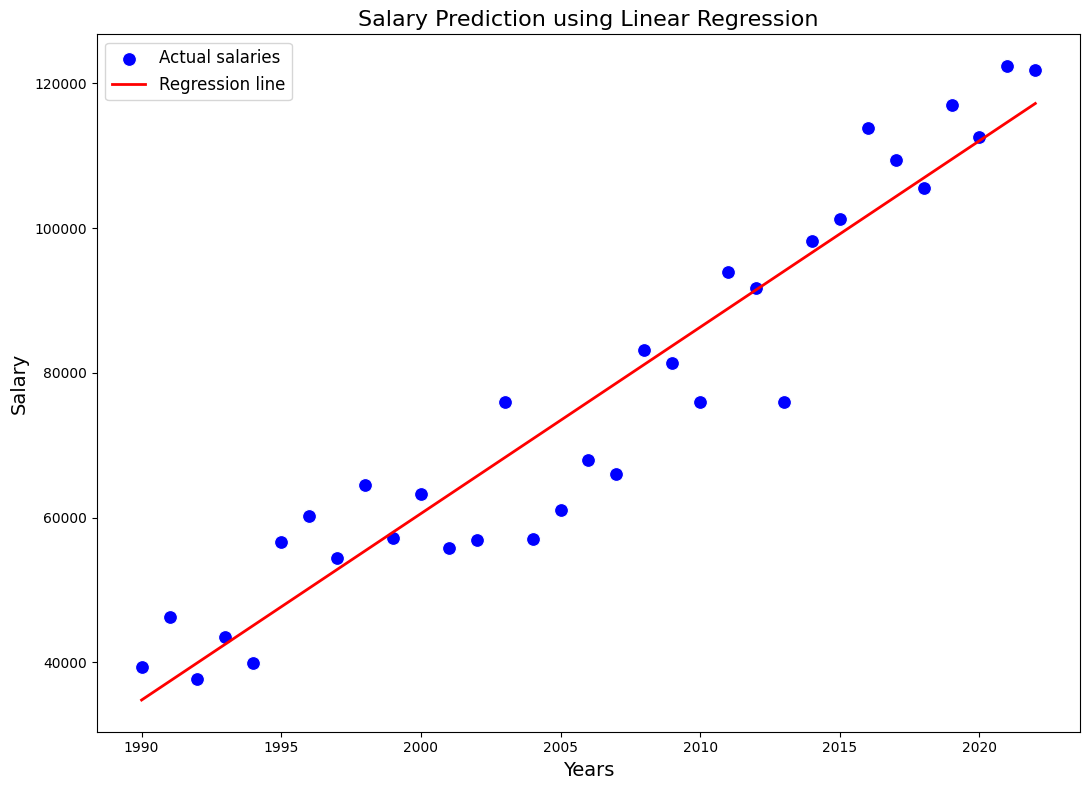

╒═════════════╤═════════════╤═════════════╕
│        bias │         MSE │   R_squared │
╞═════════════╪═════════════╪═════════════╡
│ 2.82219e-11 │ 5.88161e+07 │    0.910946 │
╘═════════════╧═════════════╧═════════════╛
Bias of the model: 2.8221896200469047e-11
Mean Squared Error of the model: 58816116.22780049
Error of the model: 58816116.22780049


In [5]:
plt.figure(figsize=(11, 8))
sns.scatterplot(x=df['Years'], y=df['Salary'], color='blue', s=100, label='Actual salaries')
sns.lineplot(x=df['Years'], y=model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.title('Salary Prediction using Linear Regression', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
y_pred = model.predict(X)
bias = np.mean(y_pred - y)
mse = mean_squared_error(y, y_pred)
r_2 = r2_score(y_true= y , y_pred=y_pred)
data = {"bias" : [bias] ,"MSE" : [mse] , "R_squared" : [r_2] }
print(tabulate.tabulate(data , data.keys(), tablefmt="fancy_grid"))
print(f"Bias of the model: {bias}")
print(f"Mean Squared Error of the model: {mse}")
print(f"Error of the model: {r_2}")

<h1 style = "font-family : Segoe UI Black;font-size : 26px ; font-weight : bold ; background-color :#C4D7B2; color : #6B240C ; padding : 10px">Result : </h1>
<p style = "font-family : Franklin Gothic Medium Cond; padding : 20px ; background-color :#C4D7B2; color : #4F4A45 ; "> 
The R^2 score indicates how well your model is performing; consider the placement dataset. If the R^2 score is one, then the regression line is perfect with no error. In this case, it's close to 1, so based on the R^2 score, we can claim that the model performs well. The MSE shows that we have a little bit of data that is widely dispersed around its central moment (mean).</p>


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">4) Material 1  Price Prediction </h1>


<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px">In this section, we want to predict the price of raw material 1, which is imported, with 1% inflation in the coming years. For ease of work, the price of this material in the coming years is calculated with the factor (F/P, 5% + 1%, n) and the result is shown in the table below.</div>

In [6]:
material1_prices = df['material 1']
future_prices = []
current_price = material1_prices.iloc[-1]
for year in range(1, 29):
    current_price = futureValue(current_price, 0.01 + 0.05, 1)
    future_prices.append(current_price)


future_df = pd.DataFrame({
    'Year': list(range(2023 , 2051)),
    'Price': future_prices
})
print(tabulate.tabulate(future_df, headers='keys', tablefmt="fancy_grid"))
output_file_path = 'future_material1_prices.xlsx'
future_df.to_excel(output_file_path, index=False)
print(f"Material1 prediction prices are saved at {output_file_path}.")

╒════╤════════╤═════════╕
│    │   Year │   Price │
╞════╪════════╪═════════╡
│  0 │   2023 │ 1.53698 │
├────┼────────┼─────────┤
│  1 │   2024 │ 1.05745 │
├────┼────────┼─────────┤
│  2 │   2025 │ 1.04424 │
├────┼────────┼─────────┤
│  3 │   2026 │ 1.04384 │
├────┼────────┼─────────┤
│  4 │   2027 │ 1.04382 │
├────┼────────┼─────────┤
│  5 │   2028 │ 1.04382 │
├────┼────────┼─────────┤
│  6 │   2029 │ 1.04382 │
├────┼────────┼─────────┤
│  7 │   2030 │ 1.04382 │
├────┼────────┼─────────┤
│  8 │   2031 │ 1.04382 │
├────┼────────┼─────────┤
│  9 │   2032 │ 1.04382 │
├────┼────────┼─────────┤
│ 10 │   2033 │ 1.04382 │
├────┼────────┼─────────┤
│ 11 │   2034 │ 1.04382 │
├────┼────────┼─────────┤
│ 12 │   2035 │ 1.04382 │
├────┼────────┼─────────┤
│ 13 │   2036 │ 1.04382 │
├────┼────────┼─────────┤
│ 14 │   2037 │ 1.04382 │
├────┼────────┼─────────┤
│ 15 │   2038 │ 1.04382 │
├────┼────────┼─────────┤
│ 16 │   2039 │ 1.04382 │
├────┼────────┼─────────┤
│ 17 │   2040 │ 1.04382 │
├────┼──────

<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">5) Material Worth Prediction</h1>



<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px">The demand for raw material 2 is decreasing, which causes its value to decrease. In this section, to evaluate the value of this material, we convert its price to the base year and apply a regression to the new data.The demand for raw material 2 is decreasing, which causes its value to decrease. In this section, to evaluate the value of this material, we convert its price to the base year and apply a regression to the new data. To convert the price to the price in the base year, the factor (P/F, 5%, n) is used.</div>

In [7]:
material_prices = df['material 2']
years = df['Years']
adjusted_prices = []
base_year = 1990

adjusted_prices = [PresentValue(0.05 , (1990 + year) - 1990 , price) for year , price in enumerate(material_prices)]
# adjp=adjusted_prices.copy()
adjusted_df = pd.DataFrame({
    "Year": years,
    "Price": adjusted_prices
})
adjusted_prices = np.array(adjusted_prices).reshape(-1, 1)
model = LinearRegression()
model.fit(np.array(years).reshape(-1, 1), adjusted_prices)
m = model.coef_[0][0]
b = model.intercept_[0]
y = lambda year : m * year + b
prediction_year = list(range(2023 , 2051))
predicted_prices = [y(year) for year in prediction_year ]

result_df = pd.DataFrame({
    "Year" : prediction_year , 
    "Price" : predicted_prices

})
print(tabulate.tabulate(zip(prediction_year , predicted_prices), headers=["year" , "price"] , tablefmt="fancy_grid"))
output_file_path = 'material2_prices.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    adjusted_df.to_excel(writer, sheet_name='Predicted', index=False)
    result_df.to_excel(writer, sheet_name='Historical', index=False)
   
print(f"Material2_Prices are saved in {output_file_path}\n.You can see them in two seperated sheets")

╒════════╤═════════╕
│   year │   price │
╞════════╪═════════╡
│   2023 │   45.05 │
├────────┼─────────┤
│   2024 │   43.7  │
├────────┼─────────┤
│   2025 │   42.35 │
├────────┼─────────┤
│   2026 │   41    │
├────────┼─────────┤
│   2027 │   39.65 │
├────────┼─────────┤
│   2028 │   38.3  │
├────────┼─────────┤
│   2029 │   36.95 │
├────────┼─────────┤
│   2030 │   35.6  │
├────────┼─────────┤
│   2031 │   34.25 │
├────────┼─────────┤
│   2032 │   32.9  │
├────────┼─────────┤
│   2033 │   31.55 │
├────────┼─────────┤
│   2034 │   30.2  │
├────────┼─────────┤
│   2035 │   28.85 │
├────────┼─────────┤
│   2036 │   27.5  │
├────────┼─────────┤
│   2037 │   26.15 │
├────────┼─────────┤
│   2038 │   24.8  │
├────────┼─────────┤
│   2039 │   23.45 │
├────────┼─────────┤
│   2040 │   22.1  │
├────────┼─────────┤
│   2041 │   20.75 │
├────────┼─────────┤
│   2042 │   19.4  │
├────────┼─────────┤
│   2043 │   18.05 │
├────────┼─────────┤
│   2044 │   16.7  │
├────────┼─────────┤
│   2045 │   

As we expected, its value in the base year is decreasing linearly with a slope of 1.35

<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">6) Regression on Material2 new prices</h1>

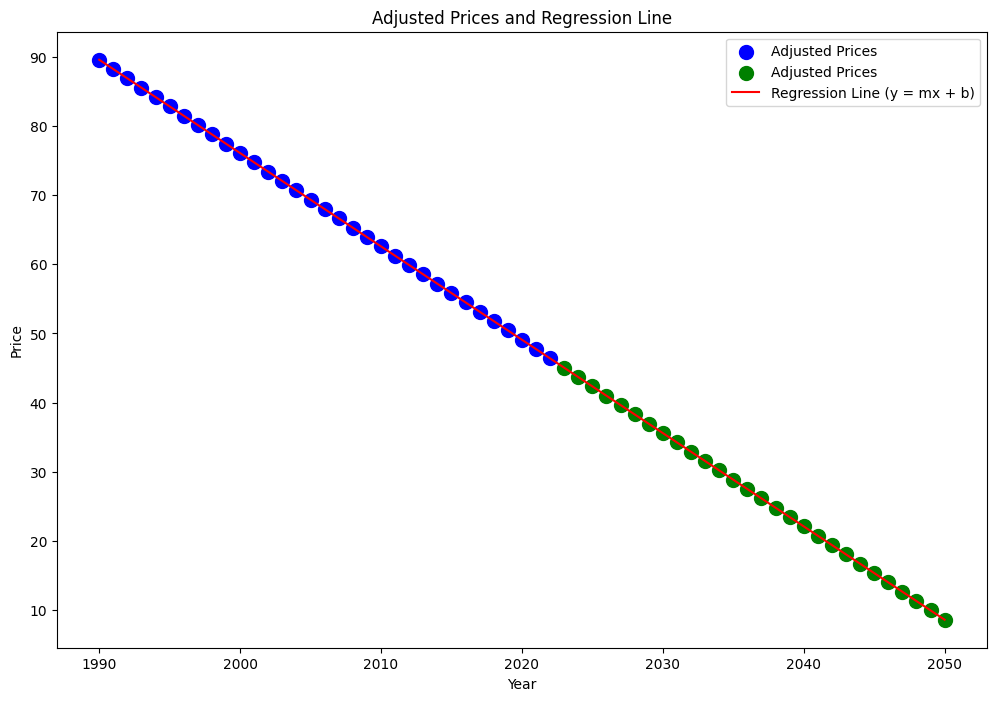

╒═══════════╤═════════════╕
│ Metrics   │      Values │
╞═══════════╪═════════════╡
│ Bias      │ 1.93361e-14 │
├───────────┼─────────────┤
│ MSE       │ 2.02925e-26 │
├───────────┼─────────────┤
│ R_squared │ 1           │
╘═══════════╧═════════════╛
Bias of the model: 1.9336081005930595e-14
Mean Squared Error of the model: 2.029250274015346e-26
R² of the model: 1.0


In [8]:
line_years = np.arange(min(years), 2051) 
line_prices = m * line_years + b  
plt.figure(figsize=(12, 8))
plt.scatter(adjusted_df['Year'], adjusted_df['Price'], color='blue', s=100, label='Adjusted Prices')
plt.scatter(result_df['Year'], result_df['Price'], color='green', s=100, label='Adjusted Prices')
plt.plot(line_years, line_prices, color='red', label='Regression Line (y = mx + b)')
plt.title('Adjusted Prices and Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

full_df = pd.concat([adjusted_df, result_df])
y_pred = model.predict(full_df[['Year']].values.reshape(-1, 1))
bias = np.mean(y_pred - full_df[['Price']].values.reshape(-1, 1))
mse = mean_squared_error(full_df[['Price']].values.reshape(-1, 1), y_pred)
r_2 = r2_score(y_true= full_df[['Price']].values.reshape(-1, 1), y_pred=y_pred)
data = {"Metrics": ["Bias", "MSE", "R_squared"],
        "Values": [bias.item(), mse, r_2]}  
print(tabulate.tabulate(data, headers="keys", tablefmt="fancy_grid"))
print(f"Bias of the model: {bias}")
print(f"Mean Squared Error of the model: {mse}")
print(f"R² of the model: {r_2}")




<h1 style = "font-family : Segoe UI Black;font-size : 26px ; font-weight : bold ; background-color :#C4D7B2; color : #6B240C ; padding : 10px">Result : </h1>
<p style = "font-family : Franklin Gothic Medium Cond; padding : 20px ; background-color :#C4D7B2; color : #4F4A45 ; ">According to the previous explanation, R2_Score is equal to one, which indicates that there is no error in the regression line.
The value of bias and mSE is also very small and shows the high accuracy of the model.
This result is not far-fetched because using the data pre-pinned by this model, data related to 2023 and later have been written.
</p>


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">7) New demand Column</h1>

In [9]:
file_path = 'new_data.xlsx'
df = pd.read_excel(file_path)
df['demand_of_product'] = np.exp((df['Years'] - 1990)/50)
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    df.to_excel(writer, index=False)
print(f"Updated data saved to {file_path}")

Updated data saved to new_data.xlsx


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">8) Regression on demand</h1>


<div style = "background-color : #FFF2D7 ; color : #344955; font-family : Franklin Gothic Medium Cond; padding : 20px">In this section, we intend to use regression to find the relationship between demand and Then, using the obtained model, predict the amount of demand until 2050.
</div>

In [10]:
file_path = 'new_data.xlsx'
df = pd.read_excel(file_path)
X = df["demand_of_product"].values.reshape(-1, 1) 
Y = df["demand"].values
model = LinearRegression()
model.fit(X, Y)
print(f"Model coefficient: {model.coef_[0]}")
print(f"Model intercept: {model.intercept_}")
print(f"Equation : {model.coef_[0]:.2f}*e^(n/50) + {model.intercept_:.2f}")

Model coefficient: -52.52243318057982
Model intercept: 151.86095275276114
Equation : -52.52*e^(n/50) + 151.86


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">9) Regression plot for demand</h1>

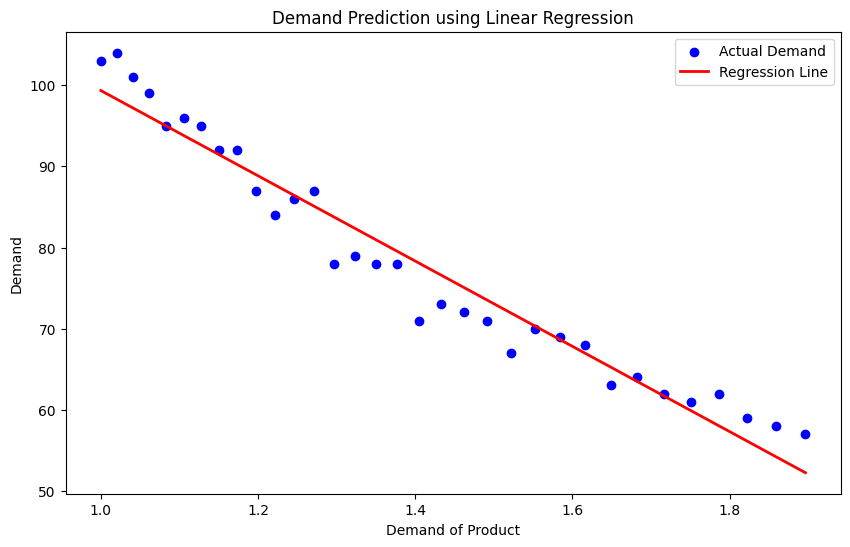

╒═════════════╤═════════╤═════════════╕
│        bias │     MSE │   R_squared │
╞═════════════╪═════════╪═════════════╡
│ 4.30632e-15 │ 10.0241 │    0.951178 │
╘═════════════╧═════════╧═════════════╛
Bias of the model: 4.306319610667274e-15
Mean Squared Error of the model: 10.02409927424594
Error of the model: 10.02409927424594


In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Demand')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Demand Prediction using Linear Regression')
plt.xlabel('Demand of Product')
plt.ylabel('Demand')
plt.legend()
plt.show()

y_pred = model.predict(X)
bias = np.mean(y_pred - Y)
mse = mean_squared_error(Y, y_pred)
r_2 = r2_score(y_true= Y , y_pred=y_pred)
data = {"bias" : [bias] ,"MSE" : [mse] , "R_squared" : [r_2] }
print(tabulate.tabulate(data , data.keys(), tablefmt="fancy_grid"))
print(f"Bias of the model: {bias}")
print(f"Mean Squared Error of the model: {mse}")
print(f"Error of the model: {mse}")



<h1 style = "font-family : Segoe UI Black;font-size : 26px ; font-weight : bold ; background-color :#C4D7B2; color : #6B240C ; padding : 10px">Result : </h1>
<p style = "font-family : Franklin Gothic Medium Cond; padding : 20px ; background-color :#C4D7B2; color : #4F4A45 ; "> R2_Score is close to one, which indicates that the model fits the data with good accuracy.
The amount of bias is also very small and shows the high accuracy of the model.
A larger value of MSE indicates the dispersion of demand
The demand for this product is decreasing and it has a range between 57 and 103. The decreasing trend occurs at a relatively good speed, but this criterion and dispersion occurred due to the decrease in demand.
</p>


<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">10) Regression on Price per unit of final product:</h1>

In [12]:
X = df['Years'].values.reshape(-1, 1)  
y = df['price'].values
model = LinearRegression()
model.fit(X, y)
print(f"Model coefficient (slope): {model.coef_[0]}")
print(f"Model intercept: {model.intercept_}")
future_years = np.arange(X.max() + 1, 2051).reshape(-1, 1)
future_prices = model.predict(future_years)
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Price': future_prices
})
print(tabulate.tabulate(future_data , headers=["Year" , "Price"] , tablefmt="fancy_grid"))
output_file_path = 'Predicted_Prices_2050.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    future_data.to_excel(writer, sheet_name='Predicted', index=False)

print(f"Predicted prices saved to {output_file_path}")


Model coefficient (slope): 125.5
Model intercept: -248528.5
╒════╤════════╤═════════╕
│    │   Year │   Price │
╞════╪════════╪═════════╡
│  0 │   2023 │  5358   │
├────┼────────┼─────────┤
│  1 │   2024 │  5483.5 │
├────┼────────┼─────────┤
│  2 │   2025 │  5609   │
├────┼────────┼─────────┤
│  3 │   2026 │  5734.5 │
├────┼────────┼─────────┤
│  4 │   2027 │  5860   │
├────┼────────┼─────────┤
│  5 │   2028 │  5985.5 │
├────┼────────┼─────────┤
│  6 │   2029 │  6111   │
├────┼────────┼─────────┤
│  7 │   2030 │  6236.5 │
├────┼────────┼─────────┤
│  8 │   2031 │  6362   │
├────┼────────┼─────────┤
│  9 │   2032 │  6487.5 │
├────┼────────┼─────────┤
│ 10 │   2033 │  6613   │
├────┼────────┼─────────┤
│ 11 │   2034 │  6738.5 │
├────┼────────┼─────────┤
│ 12 │   2035 │  6864   │
├────┼────────┼─────────┤
│ 13 │   2036 │  6989.5 │
├────┼────────┼─────────┤
│ 14 │   2037 │  7115   │
├────┼────────┼─────────┤
│ 15 │   2038 │  7240.5 │
├────┼────────┼─────────┤
│ 16 │   2039 │  7366   │
├───

<h1 style = "font-weight : bold ; text-align : center ; font-family : Rockwell Condensed ; background-color : #DCD7C9 ; color : #472D2D">11) Regression plot of final product price</h1>

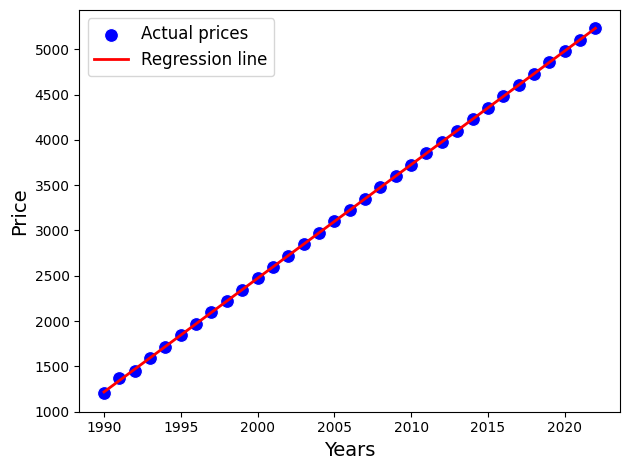

╒════════╤═══════╤═════════════╕
│   bias │   MSE │   R_squared │
╞════════╪═══════╪═════════════╡
│      0 │  49.5 │    0.999965 │
╘════════╧═══════╧═════════════╛
Bias of the model: 0.0
Mean Squared Error of the model: 49.5
Error of the model: 49.5


In [13]:
sns.scatterplot(x=df['Years'], y=df['price'], color='blue', s=100, label='Actual prices')
sns.lineplot(x=df['Years'], y=model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

y_pred = model.predict(X)
bias = np.mean(y_pred - y)
mse = mean_squared_error(y, y_pred)
r_2 = r2_score(y_true= y , y_pred=y_pred)
data = {"bias" : [bias] ,"MSE" : [mse] , "R_squared" : [r_2] }
print(tabulate.tabulate(data , data.keys(), tablefmt="fancy_grid"))
print(f"Bias of the model: {bias}")
print(f"Mean Squared Error of the model: {mse}")
print(f"Error of the model: {mse}")



<h1 style = "font-family : Segoe UI Black;font-size : 26px ; font-weight : bold ; background-color :#C4D7B2; color : #6B240C ; padding : 10px">Result : </h1>
<p style = "font-family : Franklin Gothic Medium Cond; padding : 20px ; background-color :#C4D7B2; color : #4F4A45 ; "> 
Low error rate and R2_score shows that the model is well fitted.</p>
